In [1]:
%load_ext autoreload
%autoreload 2

# 0. Libraries

------------------

In [2]:
import sys
sys.path.append(r'C:\Users\Alex\git\EC-LHC\footprint\FFP_python_v1_4')
sys.path.append(r'C:\Users\Alex\git\Masters-EC-Article\source')
from calc_footprint_FFP_adjusted01 import FFP
from k15_to_raster import K15_to_raster
from initialize_analysis import InitializeAnalysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns
import scipy as sp
import datetime as dt
import scipy
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [4]:
import pathlib
from functools import reduce


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import mutual_info_regression

In [6]:
final_imgFolder = pathlib.Path(r"G:\Meu Drive\USP-Mestrado\Masters-Data\Imgs\Final")

# 1. Reading files

------------------

In [7]:
a = InitializeAnalysis(
    ep_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\EddyPro\2-Final-Fase01020304\EddyPro_Fase01020304",
    lf_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\Dados_Brutos\IAB3",
    iab1_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\Dados_Brutos\IAB1",
    iab2_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\Dados_Brutos\IAB2\IAB2",
    footprint_file=r"G:\Meu Drive\USP-Mestrado\Masters-Data\Footprint\classification_pixel_2018-10-05-00-30to2021-01-08-00-00_pf_80.csv",
    k15_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\Footprint\k15_process_data_v2",
    # lai_file_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\LAI\process_data\lai_reduced_k15_2020.csv",
    # # evi_file_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\evi_reduced_k15_2020.csv"
    # # evi_file_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\toa\evi_reduced_k15_2020.csv"
    # # evi_file_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\sr\evi_reduced_k15_2020.csv"
    # evi_file_path=r"G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\sr\evi_reduced_mean_2020.csv"


)

Reading IAB3_EP files...
# IAB3_EP: 5	Inicio: 2018-10-05 00:30:00	Fim: 2021-01-08 00:00:00
Reading IAB3_LF files...
# IAB3_LF: 41	Inicio:2018-09-07 19:30:00	Fim: 2021-01-08 09:30:00
Reading IAB2 files...
# IAB2: 38	Inicio: 2017-02-03 09:20:00	Fim: 2021-01-22 11:30:00
Reading IAB1 files...
# IAB1: 12	Inicio: 2015-07-17 15:00:00	Fim: 2021-01-22 10:50:00
Reading Footprint file...
Inicio: 2018-10-05 00:30:00	Fim: 2021-01-08 00:00:00
Reading K15 files...
# K15: 24	Inicio: 2018-10-05 00:30:00	Fim: 2021-01-08 00:00:00
Duplicatas:  0
Verificacao de Duplicatas:  0
Duplicatas:  1
Verificacao de Duplicatas:  0
Duplicatas:  840479
Verificacao de Duplicatas:  0
Duplicatas:  507541
Verificacao de Duplicatas:  0


In [8]:
k15_evi_path = pathlib.Path(r'G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\sr\V2\k15_evi')
evi_dfs = []
for i in k15_evi_path.rglob('*.csv'):
    print(i)
    evi_dfs.append(pd.read_csv(i))
evi_df = reduce(lambda left, right: pd.merge(left, right, on=['time']), evi_dfs)

column_evi = ['time','k15_evi','k15_evi_acc_n','k15_evi_rej_n','evi_radius_median','evi_radius_mean']
evi_df = evi_df[column_evi]
evi_df.rename(columns={'time':'TIMESTAMP'}, inplace=True)
evi_df['TIMESTAMP'] = pd.to_datetime(evi_df['TIMESTAMP'])

G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\sr\V2\k15_evi\k15_evi_sum.csv
G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\sr\V2\k15_evi\k15_evi_acc_n.csv
G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\sr\V2\k15_evi\k15_evi_rej_n.csv
G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\sr\V2\k15_evi\evi_radius_median.csv
G:\Meu Drive\USP-Mestrado\Masters-Data\EVI\processed_data\sr\V2\k15_evi\evi_radius_mean.csv


C:\Users\Alex\AppData\Local\Temp\ipykernel_23796\2325117739.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  evi_df = reduce(lambda left, right: pd.merge(left, right, on=['time']), evi_dfs)


In [9]:
df = a.select_datetime(year=2020, begin_hour=7, end_hour=17)

In [10]:
df.columns

Index(['index_x', 'TIMESTAMP', 'date', 'time', 'H', 'qc_H', 'LE', 'qc_LE',
       'co2_flux', 'H_strg', 'LE_strg', 'sonic_temperature', 'air_temperature',
       'air_pressure', 'air_density', 'ET', 'e', 'es', 'RH', 'VPD', 'Tdew',
       'u_unrot', 'v_unrot', 'w_unrot', 'u_rot', 'v_rot', 'w_rot',
       'wind_speed', 'max_wind_speed', 'wind_dir', 'u*', '(z-d)/L', 'un_H',
       'H_scf', 'un_LE', 'LE_scf', 'u_var', 'v_var', 'w_var', 'ts_var',
       'index_y', 'CO2_sig_strgth_mean', 'H2O_sig_strgth_mean', 'Rn_Avg',
       'Rs_incoming_Avg', 'Rs_outgoing_Avg', 'Rl_incoming_Avg',
       'Rl_outgoing_Avg', 'Rl_incoming_meas_Avg', 'Rl_outgoing_meas_Avg',
       'shf_Avg(1)', 'shf_Avg(2)', 'precip_Tot', 'code03', 'code04', 'code09',
       'code12', 'code15', 'code19', 'code20', 'code24', 'code25', 'code33',
       'Unnamed: 0', 'datetime', 'k15_n', 'k15_filter_n', 'flag_qaqc',
       'flag_rain', 'flag_signalStr', 'footprint_acceptance', 'flag_footprint',
       'flag_k15', 'flag_basic', 'f

In [11]:
df_2 = a.iab2_df_resample

In [12]:
df_2.columns

Index(['TIMESTAMP', 'index', 'RECORD', 'PTemp_C_Avg', 'WS_ms_Avg', 'WindDir',
       'G_Wm2_Avg', 'AirTC_Avg', 'RH', 'AirTC_2_Avg', 'RH_2', 'NR_Wm2_Avg',
       'CNR_Wm2_Avg', 'Rain_mm_Tot', 'Cerrado_SF(1)', 'Cerrado_SF(2)',
       'Cerrado_SF(3)', 'Cerrado_SF(4)', 'Cerrado_SF(5)', 'Cerrado_WC(1)',
       'Cerrado_WC(2)', 'Cerrado_WC(3)', 'Cerrado_WC(4)', 'Cerrado_WC(5)',
       'BattV_Avg', 'Temp_C_Avg(1)', 'Temp_C_Avg(2)', 'Temp_C_Avg(3)',
       'Temp_C_Avg(4)', 'BattV_Min', 'Rain_mm_TOT_torre', 'Rain_mm_2_PI_Tot',
       'Rain_mm_3_LID_Tot', 'FullBR_LID1_Avg', 'FullBR_LID1',
       'FullBR_LID1_Std', 'Rain_mm_4_PI_Tot', 'Rain_mm_5_LID_Tot',
       'FullBR_LID2_Avg', 'FullBR_LID2', 'FullBR_LID2_Std', 'Rain_mm_6_EF_Tot',
       'Rain_mm_7_EF_Tot', 'Rain_mm_8_EF_Tot', 'Termopar_C'],
      dtype='object')

In [13]:
v = ['Cerrado_WC(1)','Cerrado_WC(2)', 'Cerrado_WC(3)', 'Cerrado_WC(4)', 'Cerrado_WC(5)']
df_2.loc[df_2['TIMESTAMP'].dt.year==2020, v].describe()

,Cerrado_WC(1),Cerrado_WC(2),Cerrado_WC(3),Cerrado_WC(4),Cerrado_WC(5)
count,5319.000000,16483.000000,16483.000000,16483.000000,16483.000000
mean,12.202708,11.746648,8.988998,8.910687,9.580559
std,5.413039,4.605882,3.498538,2.851619,2.841548
min,6.290667,6.372667,6.251000,6.613000,7.080000
25%,7.412167,7.467000,6.429000,6.769000,7.240500
50%,9.783333,10.670000,7.165000,7.516000,8.410000
75%,17.038333,14.340000,11.280000,10.980000,11.950000
max,28.813333,29.076667,23.440000,20.336667,19.346667


In [14]:
df_2_2020 = df_2.loc[df_2['TIMESTAMP'].dt.year==2020, v+['TIMESTAMP']]

<AxesSubplot:>

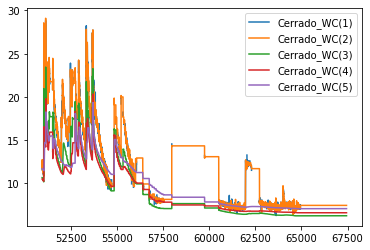

In [15]:
df_2_2020[v].plot()

In [16]:
df = pd.merge(df, df_2_2020, on='TIMESTAMP', how='outer')

In [17]:
df[['TIMESTAMP','wind_dir','wind_dir_compass']]

,TIMESTAMP,wind_dir,wind_dir_compass
0,2020-01-01 07:00:00,256.551,31.651
1,2020-01-01 07:30:00,252.850,27.950
2,2020-01-01 08:00:00,232.333,7.433
3,2020-01-01 08:30:00,217.488,352.588
4,2020-01-01 09:00:00,206.447,341.547
...,...,...,...
17563,2020-12-31 21:30:00,NaN,NaN
17564,2020-12-31 22:00:00,NaN,NaN
17565,2020-12-31 22:30:00,NaN,NaN
17566,2020-12-31 23:00:00,NaN,NaN


In [18]:
df['air_temperature'] = df['air_temperature']-273.15

In [19]:
df = pd.merge(df, evi_df, on='TIMESTAMP', how='inner')

In [20]:
df.loc[df['TIMESTAMP'].dt.month.isin([1,2,12]), 'Season'] = 'Summer'
df.loc[df['TIMESTAMP'].dt.month.isin([3,4,5]), 'Season'] = 'Autumn'
df.loc[df['TIMESTAMP'].dt.month.isin([6,7,8]), 'Season'] = 'Winter'
df.loc[df['TIMESTAMP'].dt.month.isin([9,10,11]), 'Season'] = 'Spring'

In [21]:
df = df.loc[df['flag_basic']==True]
df2 = df.loc[df['flag_full']==True]
df_r = df.loc[(df['flag_basic']==True)&
              (df['flag_full']==False)]

C:\Users\Alex\anaconda3\envs\Masters\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Alex\anaconda3\envs\Masters\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Alex\anaconda3\envs\Masters\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


ValueError: not enough values to unpack (expected 2, got 1)

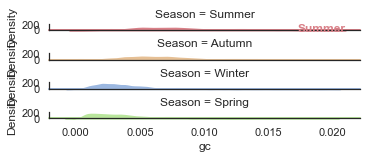

In [22]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

colors = ['#d98088','#e6c095','#9bb7e0','#b9e69c']

#summer, autumn, winter, spring
# colors = ['#b84f51','#c98806','#6cc9e6','#9fc468']
my_palette = sns.color_palette(colors)

pal = sns.cubehelix_palette(6, rot=-.25, light=.7)
g = sns.FacetGrid(df.loc[df['flag_basic']==True], row="Season", hue="Season", aspect=10, height=0.5, palette=my_palette)

g.map(sns.kdeplot, 'gc',
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

g.map(sns.kdeplot, "gc", clip_on=False, color="w", lw=2, bw_adjust=.5)

g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0.8, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
    
    ax.annotate(0.9, 0.2, 't', transform=ax.transAxes)
    
g.map(label, "gc")
g.figure.subplots_adjust(hspace=-.25)


g.set_titles("")
g.set(yticks=[], ylabel="")
g.set_xlabels('$g_c \; [m \; s^{-1}]$')
g.despine(bottom=True, left=True)
# g.set(xlim=(0,0.017))
sns.set_theme()

# g.savefig(final_imgFolder/'gc-density_allseasons.png', dpi=300)

C:\Users\Alex\anaconda3\envs\Masters\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Alex\anaconda3\envs\Masters\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Alex\anaconda3\envs\Masters\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Alex\anaconda3\envs\Masters\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


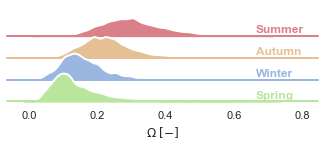

In [23]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

colors = ['#d98088','#e6c095','#9bb7e0','#b9e69c']

#summer, autumn, winter, spring
# colors = ['#b84f51','#c98806','#6cc9e6','#9fc468']
my_palette = sns.color_palette(colors)

pal = sns.cubehelix_palette(6, rot=-.25, light=.7)
g = sns.FacetGrid(df.loc[df['flag_basic']==True], row="Season", hue="Season", aspect=10, height=0.5, palette=my_palette)

g.map(sns.kdeplot, 'Omega',
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

g.map(sns.kdeplot, "Omega", clip_on=False, color="w", lw=2, bw_adjust=.5)

g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0.8, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "Omega")

g.figure.subplots_adjust(hspace=-.25)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.set_xlabels('$\Omega \; [-]$')
g.despine(bottom=True, left=True)
# g.set(xlim=(0,0.017))
sns.set_theme()

# g.savefig(final_imgFolder/'omega-density_allseasons.png', dpi=300)

In [27]:
for s in df['Season'].unique():
    print(s)
    print(df.loc[df['Season']==s,['Omega','gc']].mean())

Summer
Omega    0.307756
gc       0.008002
dtype: float64
Autumn
Omega    0.232801
gc       0.006365
dtype: float64
Winter
Omega    0.161726
gc       0.003782
dtype: float64
Spring
Omega    0.144851
gc       0.003726
dtype: float64


In [28]:
df['Omega'].mean()

0.20999993148741247